Predicted Class: Spam


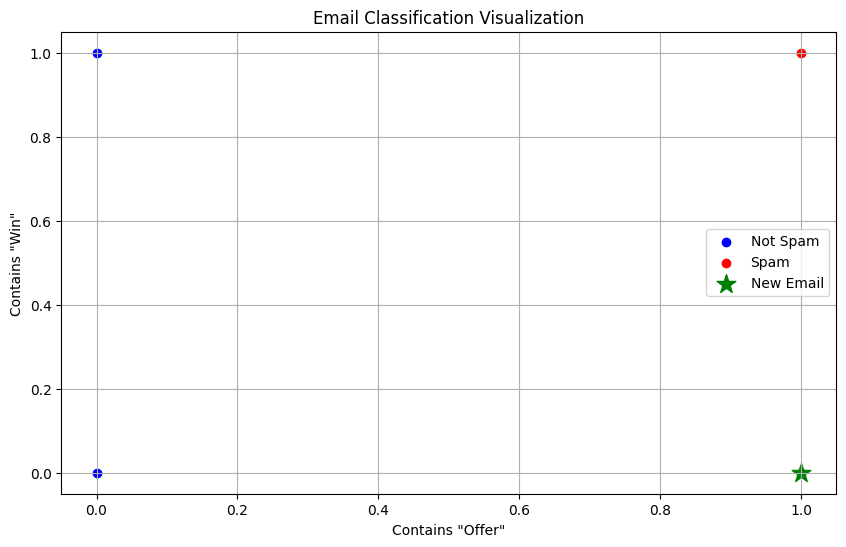

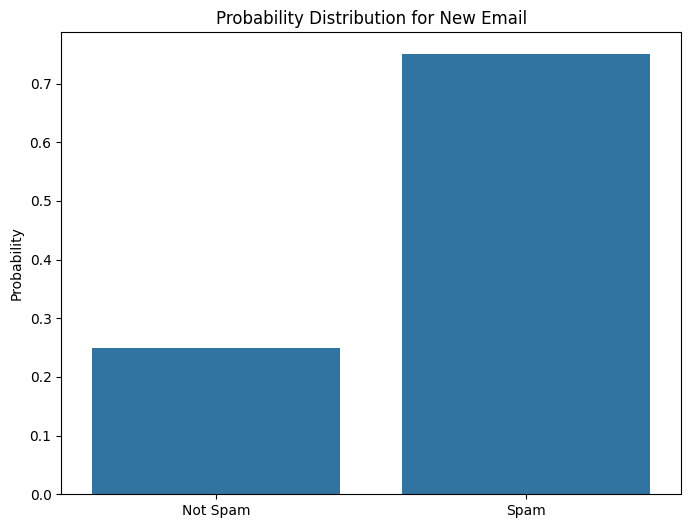

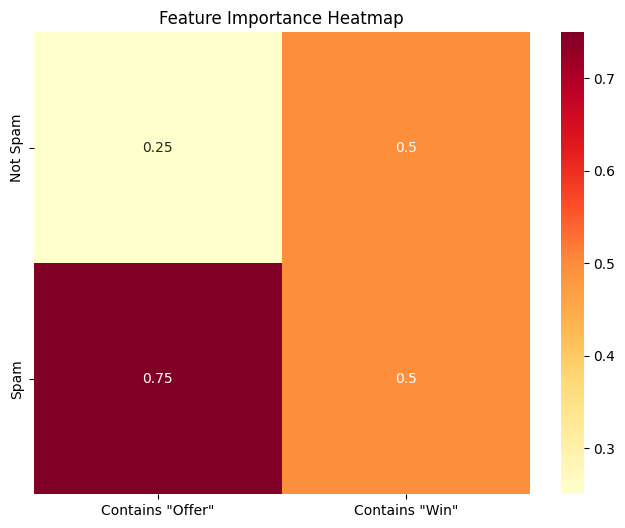

In [19]:
from sklearn.naive_bayes import BernoulliNB
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset: Binary features [Contains "Offer", Contains "Win"]
X = np.array([[1, 0], [0, 1], [1, 1], [0, 0]])  # 1 = Yes, 0 = No
y = np.array([1, 0, 1, 0])  # 1 = Spam, 0 = Not Spam

# New email: [Contains "Offer" = Yes, Contains "Win" = No]
new_email = np.array([[1, 0]])

# Train Naïve Bayes model
nb_classifier = BernoulliNB()
nb_classifier.fit(X, y)

# Predict class
prediction = nb_classifier.predict(new_email)
print("Predicted Class:", "Spam" if prediction[0] == 1 else "Not Spam")

# Visualize the training data
plt.figure(figsize=(10, 6))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Not Spam', color='blue')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Spam', color='red')
plt.scatter(new_email[0][0], new_email[0][1], color='green', marker='*', s=200, label='New Email')
plt.xlabel('Contains "Offer"')
plt.ylabel('Contains "Win"')
plt.title('Email Classification Visualization')
plt.grid(True)
plt.legend()
plt.show()

# Visualize the probabilities
probs = nb_classifier.predict_proba(new_email)
plt.figure(figsize=(8, 6))
sns.barplot(x=['Not Spam', 'Spam'], y=probs[0])
plt.title('Probability Distribution for New Email')
plt.ylabel('Probability')
plt.show()

# Visualize feature importance
feature_importance = np.exp(nb_classifier.feature_log_prob_)
plt.figure(figsize=(8, 6))
sns.heatmap(feature_importance, annot=True, xticklabels=['Contains "Offer"', 'Contains "Win"'], 
            yticklabels=['Not Spam', 'Spam'], cmap='YlOrRd')
plt.title('Feature Importance Heatmap')
plt.show()

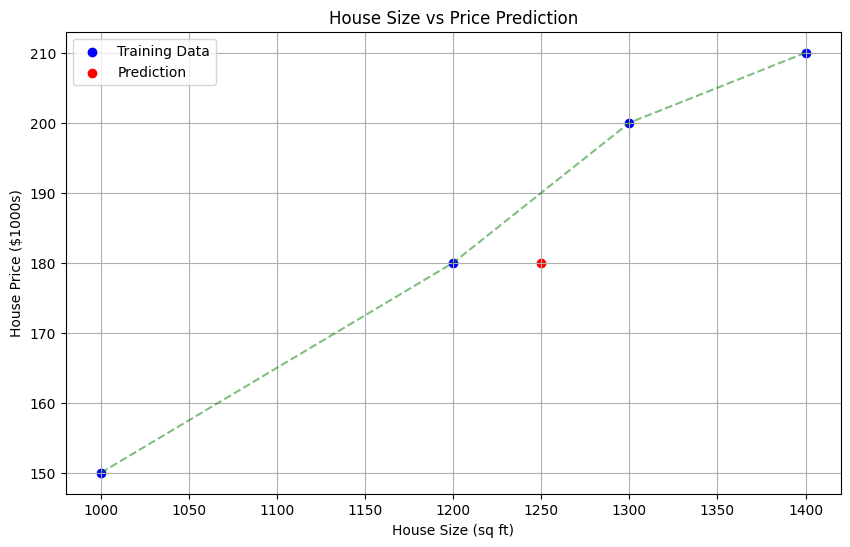

Predicted House Price ($1000s): 180


In [20]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt

# Dataset: House Size (sq ft) vs Price ($1000s)
X = np.array([[1000], [1200], [1300], [1400]])  # House sizes
y = np.array([150, 180, 200, 210])             # House prices

# New house with size 1250 sq ft
new_house = np.array([[1250]])

# Train Gaussian Naïve Bayes model
nb_regressor = GaussianNB()
nb_regressor.fit(X, y)

# Predict price
predicted_price = nb_regressor.predict(new_house)

# Create visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Training Data')
plt.scatter(new_house, predicted_price, color='red', label='Prediction')
plt.plot(X, y, color='green', linestyle='--', alpha=0.5)
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price ($1000s)')
plt.title('House Size vs Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

print("Predicted House Price ($1000s):", predicted_price[0])

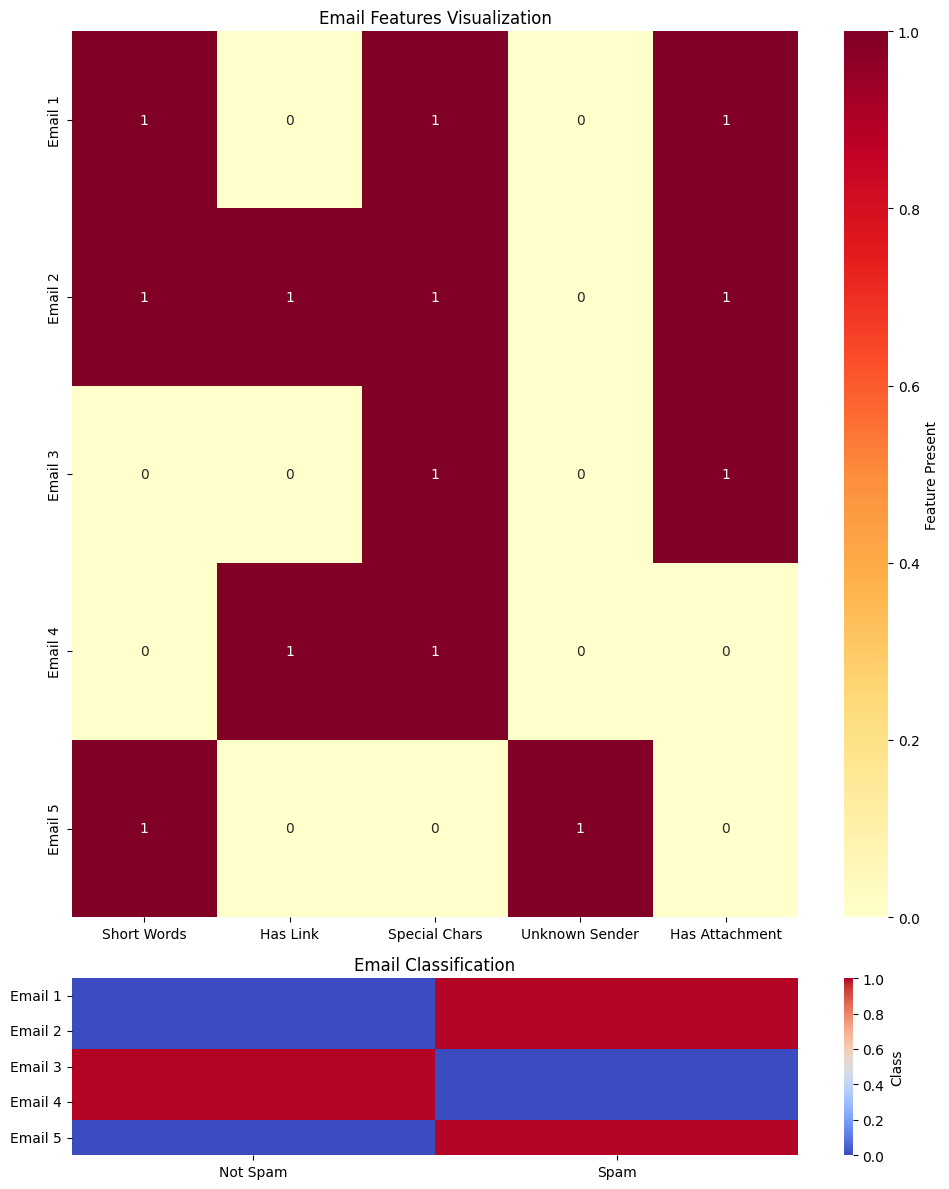

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming X and y are defined somewhere in the code
X = np.random.randint(0, 2, size=(5, 5))  # Replace with actual data
y = np.random.randint(0, 2, size=(5,))  # Replace with actual data
nb_clf = None  # Replace with actual classifier

feature_names = ['Short Words', 'Has Link', 'Special Chars', 'Unknown Sender', 'Has Attachment']
email_labels = ['Email 1', 'Email 2', 'Email 3', 'Email 4', 'Email 5']
df = pd.DataFrame(X, columns=feature_names, index=email_labels)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), gridspec_kw={'height_ratios': [5, 1]})

sns.heatmap(df, annot=True, cmap='YlOrRd', cbar_kws={'label': 'Feature Present'}, ax=ax1)
ax1.set_title('Email Features Visualization')

classification_df = pd.DataFrame({'Classification': ['Spam' if val == 1 else 'Not Spam' for val in y]}, 
                               index=email_labels)
sns.heatmap(pd.get_dummies(classification_df['Classification']), cmap='coolwarm', 
            cbar_kws={'label': 'Class'}, ax=ax2)
ax2.set_title('Email Classification')

plt.tight_layout()
plt.show()

if nb_clf is not None:
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': nb_clf.feature_log_prob_[1] - nb_clf.feature_log_prob_[0]
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 5))
    sns.barplot(data=feature_importance, x='Importance', y='Feature')
    plt.title('Feature Importance in Spam Classification')
    plt.show()